Główne biblioteki:
-
- `numpy.random` i `random` - generowanie danych losowych z różnych rozkładów
- `matplotlib.pyplot` - tworzenie histogramów, wizualizacja danych
- `seaborn` - zaawansowane wykresy, możliwość dopasowania funkcji gęstości
- `scipy.stats` - bardziej obszerny i elastyczny pakiet z wieloma funkcjami

In [532]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import seaborn as sns

Gererowanie danych.
-
Najważeniejsze rozkłady:
- Bernoulli;
- Binomial;
- Jednostajny;
- Normalny;
- Poisson;
- Wykładniczy.

In [533]:
#jesli chcemy miec powtarzalnosc wynikow dla kazdego uruchomienia 
#programu, musimy ustalic ziarno:

np.random.seed(1)

#z np.random wybieramy interesujacy nas rozklad:
print(np.random.rand())

0.417022004702574


**Rozkłady w `np.random`**
* **Jednostajny:** 
    ```python
    np.random.uniform(low, high, size)
* **Normalny:**
    ```python
    np.random.normal(loc = mean, scale = std deviation, size), np.random.standard_normal(size)
* **Jednostajny dyskretny z przedziału:** 
    ```python
    np.random.randint(low, high, size) 
    #generuje liczby całkowite z przedziału od low do high-1
* **Losowanie elementów z danego zbioru:** 
    ```python
    np.random.choice(array, size, replace, p)
* **Dwumienny:** 
    ```python
    np.random.binomial(n, p, size)
* **Poisson:**
    ```python 
    np.random.poisson(lam, size)
* **Wykładniczy:** 
    ```python
    np.random.exponential(scale = expectation)
* **Wielowymiarowy normalny:** 
    ```python
    np.random.multivariate_normal(mean, cov, size)
    (zwraca tablice z wektorami losowymi)
* **Gamma:**
    ```python
    np.random.gamma(shape, scale, size)

__Przykłady:__

In [534]:
#rzucamy 5 razy symetryczną kostką do gry 
print(np.random.choice(range(1, 7), size=5, replace=True, p=None))

#teraz rzucamy 5 razy niesymetryczną kostką
print(np.random.choice(range(1, 7), size=5, p=[1 / 4, 1 / 4] + ([1 / 8] * 4)))

#generujemy numpy tablicę zawierającą wyniki 10000 niezależnych eksperymentów losowych, każdy o rozkładzie Poissona ze średnią 3:
poisson_arr = np.random.poisson(lam=3, size=1000)
print(np.mean(poisson_arr))

[5 1 2 4 6]
[1 1 1 2 2]
3.02


**Zadanie 1.**
Oszacuj prawdopodobieństwo, z jakim suma n=5 niezależnych zmiennych losowych o rozkładzie jednostajnym (standardowym) jest większa niż 1. Spróbuj wykonać podobny eksperyment dla innych liczb i zgadnąć wzór ogólny dla n. 
**Zadanie dodatkowe:**
Kot w butach wchodzi do baru i wielokrotnie nalewa mleka do kubka o objętości jeden. Za każdym razem ilość nalanego mleka jest zmienną losową o rozkładzie jednostajnym. Oblicz, ile razy średnio kot w butach musi przechylić karton, zanim wypełni on swój kubek do pełna. (Najpierw oszacuj wynik eksperymentalnie, a następnie postaraj się uzyskać dokładną wartość oczekiwaną i porównaj wyniki).

**Zadanie 2.**
Napisz bezargumentową funkcję symulującą rzut symetryczną monetą, a następnie za jej pomocą napisz funkcję losującą liczbę ze standardowego rozkładu jednostajnego. Jedyne dostępne funkcjonalności losujące to: 
`np.random.binomial(5, 0.5, 1)` oraz `np.random.binomial(6, 0.5, 1)`. __Zadanie dodatkowe:__ Mając symetryczną monetę oraz funkcję `scipy.stats.norm.ppf()`, wygeneruj dane o standardowym rozkładzie normalnym.

**Zadanie 3.**
Napisz funkcję `asymmetrical_coin(p = np.random.rand())` symulującą rzut niesymetryczną monetą. Następnie, zastanów się jak zasymulować rzut niesymetryczną monetą z prawdopodobieństwem wypadnięcia reszki równym `q` mając do dyspozycji niesymetryczną monetę o nieznanym rozkładzie (asymmetrical_coin()). Zastanów się, ile średnio rzutów potrzeba, aby przeprowadzić tę symulację.

**Zadanie 4.**
Oszacuj średnią ilość rzutów symetryczną sześcienną kostką do pierwszego wypadnięcia (spójnej) sekwencji 66 oraz jaka średnio będzie suma oczek ze wszystkich dotychczasowych rzutów w tym momencie. Następnie napisz funkcję szacującą ilość rzutów symetrycznej kostki d-n (n ścian) do momentu wypadnięcia danej sekwencji. Spróbuj policzyć wynik dla n=26 i sekwencji odpowiadającej słowu abracadabra. 
**Zadanie dodatkowe (trudne)**:
Dany jest skończony alfabet $A$. W każdym momencie do początkowo pustego napisu dodawana jest do niego losowo wybrana litera ze zbioru $A$ z ustalonym rozkładem $p$. Znajdź wzór ogólny na średni czas oczekiwania do momentu pojawienia się w naszym napisie danego podsłowa. Jak myślisz, od jakich strukturalnych parametrów szukanego podsłowa (oprócz jego długości) może zależeć ten czas?

**Zadanie 5.**
Grasz w następującą grę. W każdym ruchu zostaje rzuconych 20 symetrycznych monet. Po zobaczeniu wyniku możesz zdecydować albo zakończyć grę i odebrać wygraną (w PLN) równą liczbie reszek na stole, albo dopłacić 1 PLN i grać dalej. Spróbuj przetestować kilka strategii, aby znaleźć tą, która maksymalizuje oczekiwaną sumaryczną wygraną w tej grze. Ile ona wynosi?

**Zadanie 6.**
W zbiórce internetowej, internauci kolejno i niezależnie wpłacają kwotę o rozkładzie wykładniczym, każdy o średniej $\frac{1}{5}$. Oszacuj średnią i wariancję liczby internatów, którzy dokonają wpłaty do momentu przekroczenia kwoty 10000. Zastosuj dwa podejścia: jedno wykorzystujące `np.random.poisson()` oraz drugie wykorzystujące `np.random.exponential()`.

__Tworzenie histogramu:__
-
Za tworzenie histogramu odpowiada funkcja `pyplot.hist` z pakietu matplotlib. Do jej najważniejszych parametrów należą:
* __data__ 
* __bins__
może być liczbą definiującą ilość równych przedziałów...
lub ciągiem określającym granice przedziałów!
* __range__ 
(min, max) obcina dane do zadanego przedziału
* __density__ = False
    True/False; jeśli ustawiony na True normalizuje dane do pewnego rozkładu prawdopodobieństwa
* __cumulative__ = False
    True/False; jeśli ustawiony na True obrazuje kumulatywny rozkład 
* __alpha__, __color__, __edgecolor__ itd...
    ustalają odpowiednio poziom przezroczystości wykresu, kolor wypełnienia i kolor obwódki 
    



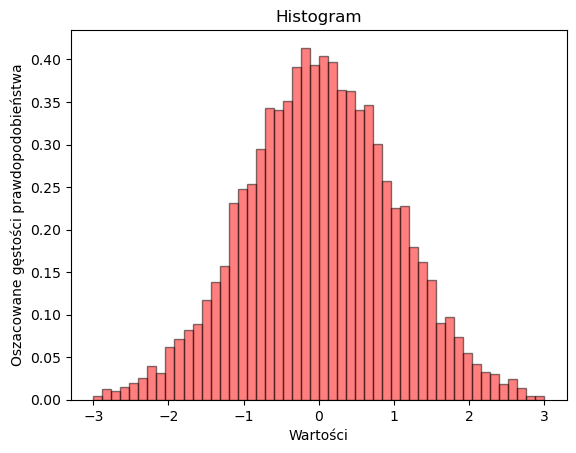

In [535]:
data = np.random.standard_normal(size=10000)

#tworzymy histogram za pomocą plt.hist
#argument density=True służy normalizacji wykresu
#warto poeksperymentować z argumentem bins
plt.hist(data, bins=50, density=True, alpha=0.5, color='r', edgecolor='black', range=(-3, 3), cumulative=False)

plt.title('Histogram')
plt.xlabel('Wartości')
plt.ylabel('Oszacowane gęstości prawdopodobieństwa')

#piszemy data;, aby nie wyświetlać naszej tablicy
data;

Jeśli chcemy porównać nasz znormalizowany histogram z teoretyczną funkcją gęstości naszej zmiennej, możemy nanieść na histogram ową funkcję w następujący sposób:

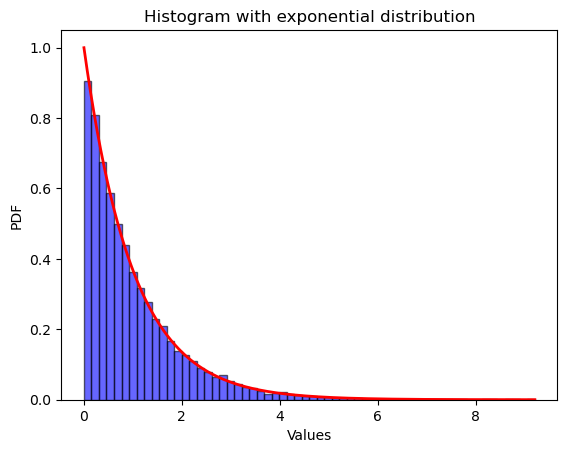

In [536]:
#funkcje gęstości bierzemy z biblioteki scipy.stats 
import scipy.stats as stats

data = np.random.exponential(1, size=10000)

x = np.linspace(np.min(data), np.max(data), 10000)
pdf_x = stats.expon.pdf(x, scale=1)

plt.hist(data, bins=60, density=True, alpha=0.6, color='b', edgecolor='black')
plt.title('Histogram with exponential distribution')
plt.xlabel('Values')
plt.ylabel('PDF')
plt.plot(x, pdf_x, color='r', lw=2)
#lw ustawia szerokość linii 

Możemy postąpić analogicznie przy szacowaniu __dystrybuanty__ (___cdf___) rozkładu danych:

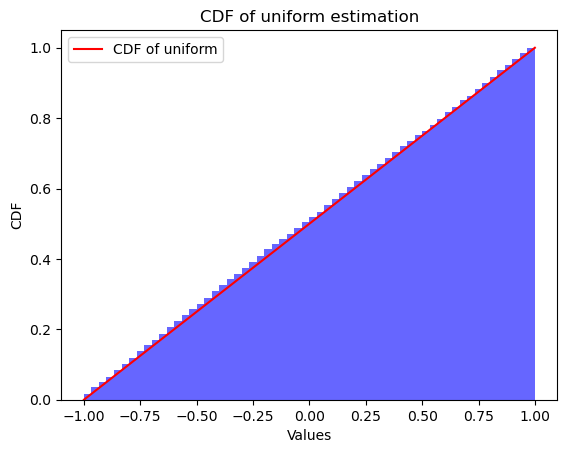

In [537]:
data = np.random.uniform(low=-1, high=1, size=10000)

x = np.linspace(np.min(data), np.max(data), 10000)
x_cdf = stats.uniform.cdf(x, loc=-1, scale=2)
#scale tutaj oznacza długość przedziału

fig, ax = plt.subplots()

ax.hist(data, bins=60, density=True, alpha=0.6, color='b', cumulative=True)
ax.plot(x, x_cdf, color='red', lw=1.5, label='CDF of uniform')
ax.set(xlabel='Values', ylabel='CDF', title='CDF of uniform estimation')
ax.legend()


Możemy też korzystać z pakietu scipy.stats, aby generować dane o danym rozkładzie, korzystając z metody rvs (również zwracana jest numpy.ndarray).

In [538]:
from scipy.stats import binom

data = binom.rvs(n=5, p=0.5, size=10)
print(type(data))
print(data)

<class 'numpy.ndarray'>
[3 2 4 0 3 2 1 1 3 3]


Oczywiście możemy porównywać histogramy wizualnie, stawiając je obok siebie w jednej figurze:

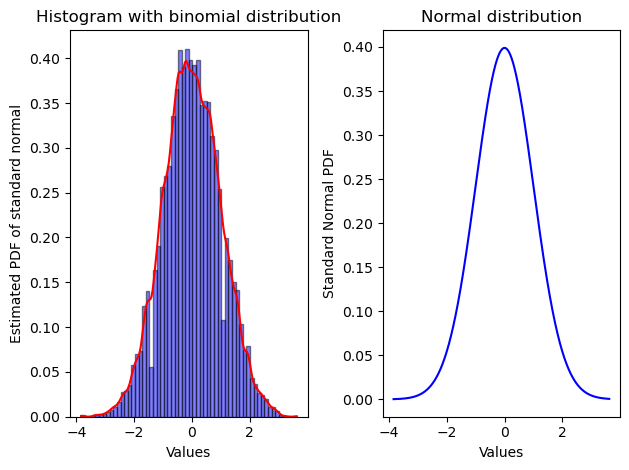

In [539]:
from scipy.stats import norm
from seaborn import kdeplot

np.random.seed(1)

data = np.random.binomial(n=1000, p=0.5, size=10000)
data = data - np.mean(data)
data = data / (np.var(data) ** 0.5)

fig, ax = plt.subplots(1, 2)

ax[0].hist(data, bins=60, density=True, alpha=0.5, color='b', edgecolor='black')
kdeplot(data, ax=ax[0], fill=False, color='r', clip=(min(data), max(data)), bw_adjust=0.5)
ax[0].set_title('Histogram with binomial distribution')
ax[0].set_xlabel('Values')
ax[0].set_ylabel('Estimated PDF of standard normal')

x = np.linspace(np.min(data), np.max(data), 1000)
pdf_x = norm.pdf(x)

ax[1].plot(x, pdf_x, color='b')
ax[1].set(xlabel='Values', ylabel='Standard Normal PDF', title='Normal distribution')

fig.tight_layout()
fig.savefig('comparison.png')



Mając pewne dane pochodzące z nieznanego rozkładu możemy użyć wykresu KDE (kernel density estimation), aby zwizualizować szacunkową gęstość tego rozkładu. Do celu potrzebujemy biblioteki `seaborn`.

Text(0.5, 1.0, 'Gaussian')

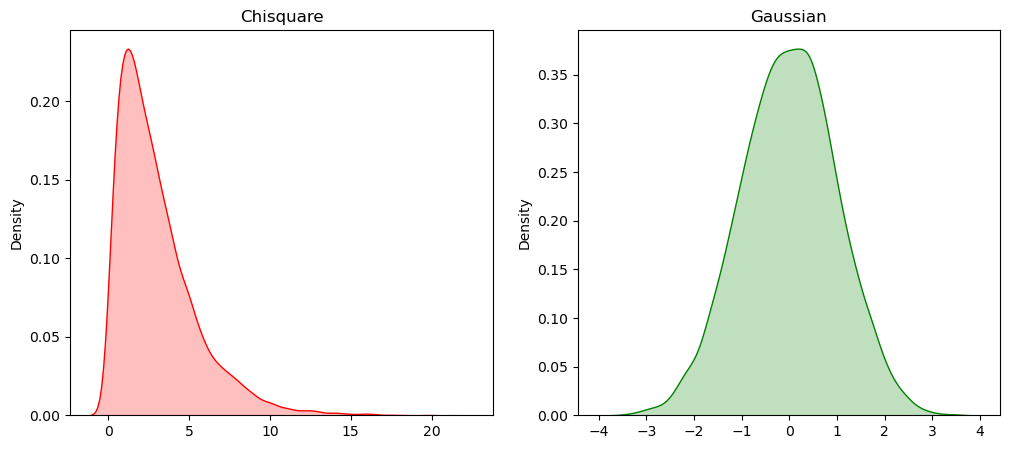

In [540]:
from seaborn import kdeplot as kde
from scipy import stats

data_chi = np.random.chisquare(3, 10000)
data_gaussian = stats.norm.rvs(scale=1, loc=0, size=10000)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
kde(data_chi, fill=True, color='red')
plt.title('Chisquare')

plt.subplot(1, 2, 2)
kde(data_gaussian, fill=True, color='green')
plt.title('Gaussian')



Do ważniejszych parametrów funkcji `seaborn.kdeplot` należy tzw. _bandwidth_, który kontroluje poziom wygładzenia estymacji wykresu funkcji gęstości. Jeśli jego wartość jest mała, nasz wykres będzie bardziej wrażliwy na drobne fluktuacje w danych (możliwy _overfitting_). Wraz ze zwiększaniem wartości _bandwidth_ funkcja KDE staje się bardziej wygładzona, skutkując w utracie drobnych szczegółów w danych, dając w zamian bardziej ogólny obraz dystrybucji. (możliwy _underfitting_). Warto pobróbować kilka wartości, aby znaleźć złoty środek.

(0.0, 10.0)

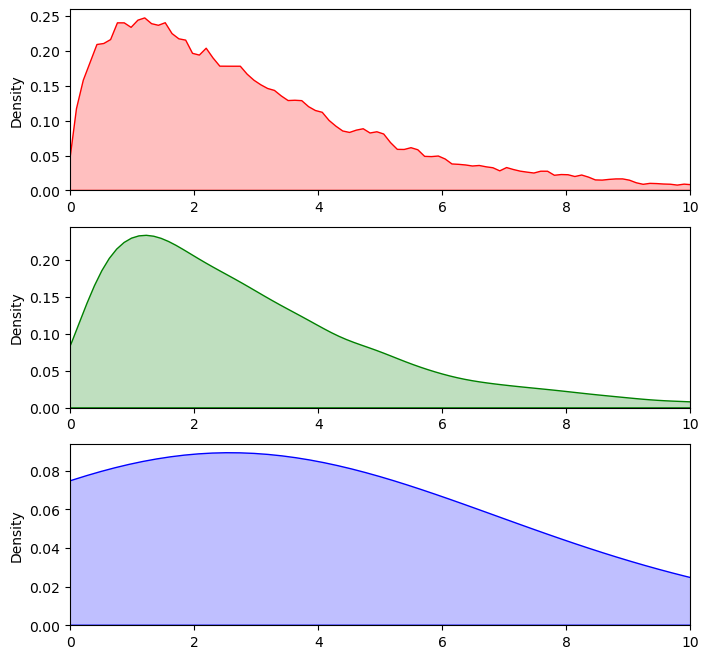

In [541]:
plt.figure(figsize=(8, 8))

plt.subplot(3, 1, 1)
kde(data_chi, fill=True, color='red', bw_adjust=0.2)
plt.xlim(0, 10)

plt.subplot(3, 1, 2)
kde(data_chi, fill=True, color='green', bw_adjust=1.0)
plt.xlim(0, 10)

plt.subplot(3, 1, 3)
kde(data_chi, fill=True, color='blue', bw_adjust=10)
plt.xlim(0, 10)



Inne ważne parametry `seaborn.kdeplot` obejmują:
* __fill__ (=shade)
False/True; aktywuje wypełnienie pod krzywą
* __clip__
odpowiednik ___range___ z `matplotlib.pyplot.hist`
* __cumulative__
* __lw__
określa szerokość linii wykresu.

___Seaborn___ umożliwia również nakładać wykres KDE na histogram, wykorzystując ___seaborn.histplot___ z parametrem `kde=True`

Jeśli chcemy oszacować dystrybuantę bądź gęstość naszego rozkładu, nie musimy ograniczać się do wizualizacji. Moduł `scipy.stats` zapewnia funkcję `gaussian_kde`, która przyjmuje dane i zwraca obiekt będący funkcją (szacunkową funkcją gęstości rozkładu tych danych):

<Axes: ylabel='Density'>

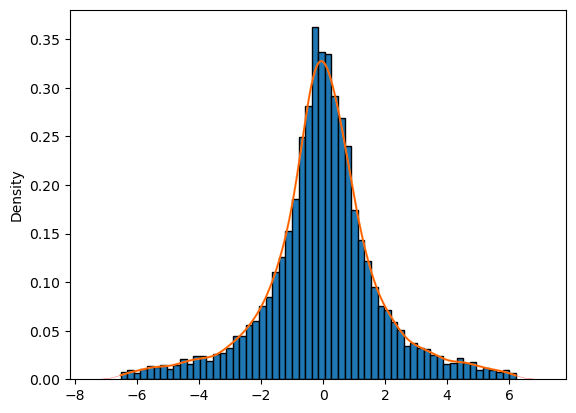

In [542]:
from scipy.stats import gaussian_kde

data = np.random.standard_cauchy(size=10000)

#ze względu na specyfikę rozkładu Cauchyego, dobrym pomysłem 
#będzie pozbycie się tzw. outliers

lower_bound = np.percentile(data, 5)
upper_bound = np.percentile(data, 95)


def outlier_filter(x):
    return (x >= lower_bound) and (x <= upper_bound)


outlier_filter = np.vectorize(outlier_filter)
data_filter = outlier_filter(data)
data = data[data_filter]

kde = gaussian_kde(data)
kde_vec = np.vectorize(kde)

x = np.linspace(np.min(data), np.max(data), 10000)
pdf = kde_vec(x)

plt.hist(data, bins=60, density=True, edgecolor='black')
plt.plot(x, pdf)

###dla porownania naniesmy jeszcze wykres szacunkowego pdf uzyskanego metodą kde:
sns.kdeplot(data, fill=False, color='red', lw=0.2)
###widać, że wykresy się pokrywają



W podobny sposób możemy szacować dystrybuantę. Biblioteka `statsmodels` udostępnia klasę `ECDF`, która szybko oblicza empiryczną dystrybuantę. Pouczającym zadaniem jest napisanie samemu takiej funkcji.

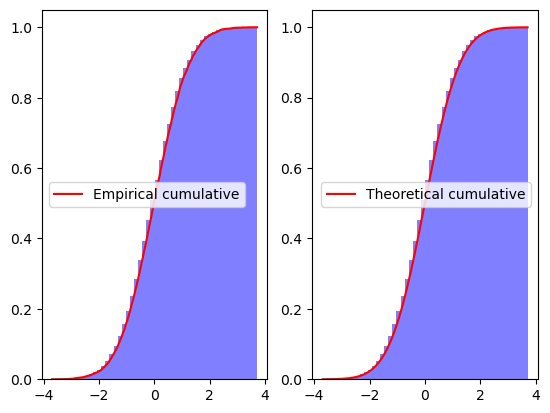

In [543]:
from scipy.stats import norm


def cdf_estimation(x, sorted_data: np.ndarray) -> float:
    result = np.searchsorted(sorted_data, x, side='right') / len(sorted_data)
    return result


data = np.random.standard_normal(size=10000)
sorted_data = np.sort(data)

x = np.linspace(min(data), max(data), 10000)
norm_ecdf = cdf_estimation(x, sorted_data)
norm_cdf = norm.cdf(x)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].plot(x, norm_ecdf, label="Empirical cumulative", color='red')
ax[0].hist(data, bins=50, cumulative=True, density=True, alpha=0.5, color='blue')
ax[0].legend()

ax[1].plot(x, norm_cdf, label="Theoretical cumulative", color='red')
ax[1].hist(data, bins=50, cumulative=True, density=True, alpha=0.5, color='blue')
ax[1].legend()

data;


Testowanie dystrybucji i ___scipy.stats:___
-
W wielu przypadkach heurystyka i  wizualna ocena pozwala stwierdzić, że dystrybucja naszych danych z wystarczającą dokładnością przypomina oczekiwaną. Jednak na dłuższą metę konieczne będą standardowe metody pozwalające wyrazić to podobieństwo w sposób ilościowy, a także bardziej ścisły algorytm na testowanie hipotez dotyczących rozkładu. Przykładem takiej metody jest następujące: 
1. Naszym celem jest przetestowanie hipotezy zerowej, mówiącej, że pewne zjawisko ma dany rozkład teoretyczny.
2. Porównujemy empiryczny rozkład danych z rozkładem teoretycznym i obliczamy odległość między nimi w pewnej ustalonej metryce.
3. Obliczamy tzw. ___p value___, czyli prawdopodobieństwo warunkowe, że przy założeniu hipotezy zerowej, losowo pobrane dane empiryczne osiągną wynik (odległość od rozkładu teoretycznego) nie lepszy niż ten z punktu 2. Jeśli ___p value___ jest wystarczająco małe (zazwyczaj jeśli $p<0.05$), odrzucamy hipotezę zerową.

__Przykład 1.__
Sprawdzanie, czy sześcienna kostka jest uczciwa.
W przypadku danych kategorycznych o pewnym rozkładzie dyskretnym możemy posłużyć się tzw. testem ___Chi-Square___, który jest dostępny w module `scipy.stats`.

True
Empirical counts: [104  90 100  96 110 100]
Chi_stat: 2.32
P_value: 0.8033249910842464


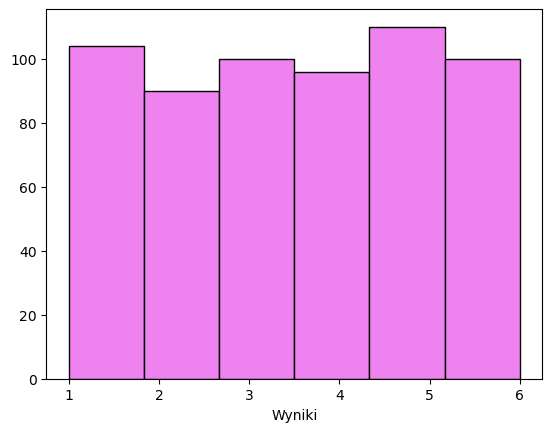

In [544]:
from scipy.stats import chisquare
from matplotlib import pyplot as plt

np.random.seed(1)
rolls = np.random.choice([1, 2, 3, 4, 5, 6], size=600, p=None)
empirical_counts = np.bincount(rolls, minlength=7)[1:]
expected_counts = np.array([100] * 6)

chi_stat, p_value = chisquare(empirical_counts, expected_counts)

print(chi_stat == np.sum((empirical_counts - expected_counts) ** 2 / expected_counts))

print(f'Empirical counts: {empirical_counts}')
print(f'Chi_stat: {chi_stat}')
print(f'P_value: {p_value}')

plt.hist(rolls, bins=6, edgecolor='black', color='violet')
plt.xlabel('Wyniki')
rolls;

##wysokie chi_stat i niskie p_value przemawiają za odrzuceniem hipotezy zerowej

True
Empirical counts: [200 191  51  57  53  48]
Chi_stat: 274.44
P_value: 3.1141521737431966e-57


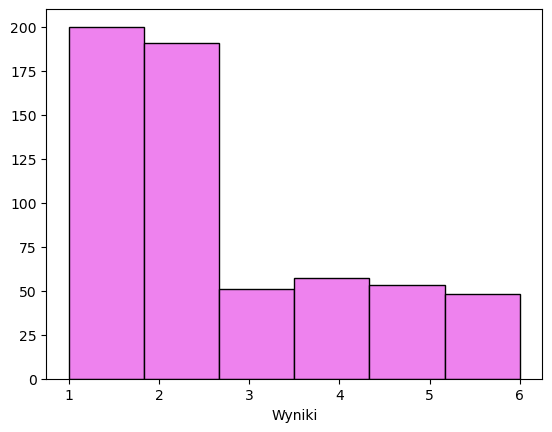

In [545]:
from scipy.stats import chisquare

np.random.seed(1)
rolls = np.random.choice([1, 2, 3, 4, 5, 6], size=600, p=[1 / 3, 1 / 3, 1 / 12, 1 / 12, 1 / 12, 1 / 12])
empirical_counts = np.bincount(rolls, minlength=7)[1:]
expected_counts = np.array([100] * 6)

plt.hist(rolls, bins=6, edgecolor='black', color='violet')
plt.xlabel('Wyniki')

chi_stat, p_value = chisquare(empirical_counts, expected_counts)

print(chi_stat == np.sum((empirical_counts - expected_counts) ** 2 / expected_counts))

print(f'Empirical counts: {empirical_counts}')
print(f'Chi_stat: {chi_stat}')
print(f'P_value: {p_value}')

##wysokie chi_stat i niskie p_value przemawiają za odrzuceniem hipotezy zerowej

Oprócz testowania dystrybucji pod wieloma kątami, `scipy.stats` oferuje wiele funkcji pozwalających na sprawne obliczanie wielu parametrów najważniejszych rozkładów:

In [546]:
import scipy.stats as stats

print(stats.norm.pdf(0, loc=0, scale=1))
print(stats.binom.pmf(3, n=7, p=0.4))
print(stats.poisson.cdf(12, mu=13))
print(stats.poisson(mu=3).mean())
print(stats.multivariate_normal.pdf([1 / 2, 3 / 2], [1, 1], cov=[[1, 0], [0, 1]]))

0.3989422804014327
0.290304
0.46310474709968075
3.0
0.12394999430965298


Mając szacunkową funkcję gęstości (uzyskaną na przykład za pomocą `scipy.stats.gaussian_kde`) możemy obliczyć różne własności tej dystrybucji, numerycznie całkując odpowiednie funkcje (jako alternatywa do metody Monte-Carlo):

In [547]:
from scipy.stats import gaussian_kde
from scipy.integrate import quad

data = np.random.binomial(n=100, p=0.3, size=20000)

kde = gaussian_kde(data)


##teraz calkujemy funkcję x^2 * kde, aby oszacować drugi moment rozkładu dwumiennego:
def integrand(x: float) -> float:
    return (x ** 2) * kde(x)


numerical_second_moment, _ = quad(integrand, 0, 100)
monte_carlo_second_moment = np.mean(data ** 2)

theoretical_second_moment = (100 * 0.3) + (9900 * 0.3 * 0.3)

print(numerical_second_moment)
print(monte_carlo_second_moment)
print(theoretical_second_moment)





921.361811770811
920.9652
921.0


__Najważniejsze testy statystyczne:__
-
* __T-Test__
    - porównuje dwie grupy danych pod kątem średniej rozkładu (domyślnie przy założeniu równych wariancji)
* __Chi-Squared Test__
    - sprawdza, czy empiryczny rozkład zgadza się z oczekiwanym (dla rozkładów dyskretnych i danych kategorycznych)
* __Kolmogorov-Smirnov Test__
    - porównuje rozkład danych z ustalonym rozkładem teoretycznym
* __Shapiro-Wilk Test__
    - służy do badania, czy dane mają rozkład normalny
    - działa dobrze dla niewielkich zbiorów danych (gdy $n $~$ 5 \cdot 10^3$)
* __Mann-Whitney U Test__
    - nieparametryczny test porównujący dwie grupy danych pod względem rozkładu (porównaj z __Kolmogorov-Smirnov Test__)
    - używany, gdy dane nie mają rozkładu normalnego

__Przykład 2.__
Porównanie ręcznej implementacji testu Kolmogorova-Smirnova z `scipy_stats.kstest`:
Metryką w tym teście jest metryka supremum pomiędzy przybliżoną dystrybuantą zaobserwowanych danych a teoretyczną dystrybuantą rozkładu referencyjnego, tj: $$ d = \sup_{x} \left|F_{\text{empirical}} - F_{\text{theoretical}} \right | $$
Działa on szczególnie dobrze dla danych o małym współczynniku __kurtozy__ (gdy ogon dystrybucji ma mniejsze znaczenie i wraz z oddalaniem się od średniej tempo spadku prawdopodobieństwa obserwacji relatywnie ekstremalnych wyników jest wysokie), ponieważ dla kumulatywnych funkcji metryka supremum jest mniej wrażliwa na różnice w obrębie ogonów dystrybucji. Dlatego dla rozkładów modelujących cykliczne zjawiska bardziej dokładne okazują się testy bazujące na statystyce biorącej pod uwagę znak różnicy, tj. $$ d = \sup_{x} (F_{\text{empirical}} - F_{\text{theoretical}}) - \inf_{x} (F_{\text{empirical}} - F_{\text{theoretical}}) $$


ks.statistic z scipy.stat.kstest: 0.0075557394152482305
ks.statistic z ręcznej implementacji: 0.007370257659543578
p value (zależne od wielkości próbki!): 0.6150036569532741
0.0075557394152482305


Test nie stwierdził, że dane nie mają rozkładu normalnego. Hipoteza zerowa przetrwała.


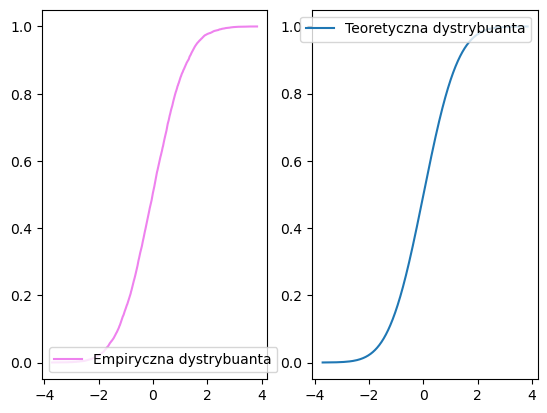

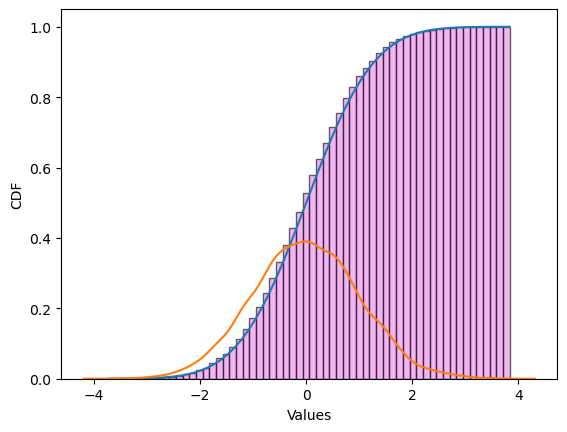

In [548]:
from scipy.stats import kstest
import scipy.stats

np.random.seed(1)


def ks_test(data: np.ndarray, cdf, bins=10000, plot=False):
    data_sorted = np.sort(data)

    def ecdf(x: float):
        return np.searchsorted(data_sorted, x, side='right') / len(data_sorted)

    axis = np.linspace(np.min(data_sorted), np.max(data_sorted), bins)
    empirical = ecdf(axis)
    theoretical = cdf(axis)

    if plot == True:
        fig, ax = plt.subplots(1, 2)
        ax[0].plot(data_sorted, ecdf(data_sorted), label="Empiryczna dystrybuanta", color='violet')
        ax[0].legend()
        ax[1].plot(data_sorted, cdf(data_sorted), label="Teoretyczna dystrybuanta")
        ax[1].legend()

    return np.max(np.abs(empirical - theoretical))



def alt(data: np.ndarray, cdf):
    data_sorted = np.sort(data)
    length = len(data_sorted)
    empirical = np.linspace(0, 1, length+1)
    empirical = empirical[1:]
    theoretical = cdf(data_sorted)
    return np.max(np.abs(empirical - theoretical))

data = np.random.binomial(n=50000, p=0.5, size=10000)
data = data - np.mean(data)
data = data / np.sqrt(np.var(data))
stat, p = kstest(data, 'norm', args=(0, 1))
stat_handmade = ks_test(data, cdf=scipy.stats.norm.cdf, plot=True)
stat_alt = alt(data, cdf=scipy.stats.norm.cdf)

x = np.linspace(np.min(data), np.max(data), 10000)

fig, ax = plt.subplots()
ax.hist(data, density=True, cumulative=True, bins=60, edgecolor='black', alpha=0.6, color='violet')
ax.plot(x, scipy.stats.norm.cdf(x))
ax.set(ylabel='CDF', xlabel='Values')
kdeplot(data, ax=ax)

print(f'ks.statistic z scipy.stat.kstest: {stat}')
print(f'ks.statistic z ręcznej implementacji: {stat_handmade}')
print(f'p value (zależne od wielkości próbki!): {p}')
print(stat_alt)

print('\n')

if p < 0.05:
    print(f'Dane nie mają rozkładu normalnego!')
else:
    print(f'Test nie stwierdził, że dane nie mają rozkładu normalnego. Hipoteza zerowa przetrwała.')


Warto poeksperymentować z tym, jak p_value odpowiadający danej wartości stat ks zmienia się wraz ze wzrostem rozmiaru próbki. Przy bardzo dużym zbiorze danych, jeśli nasza dystrybucja nie jest dokładnie tą teoretyczną, ks-test wykryje nawet praktycznie zaniedbywalne rozbieżności i zwróci p_value bardzo bliski zeru. Ważne jest więc dobranie odpowiedniej wielkości próbki oraz progu odrzucenia hipotezy, w zależności od pożądanego stopnia ogólności/dokładności. Istnieją narzędzia, aby odgórnie ustalić pożądany przedział ufności i na jego podstawie zdefiniować powyższe argumenty (np. __G*Power__). 

0.0155
0.1808532467067878
Brak wystarczających dowodów, aby stwierdzić, że dane nie pochodzą z tego samego rozkładu.


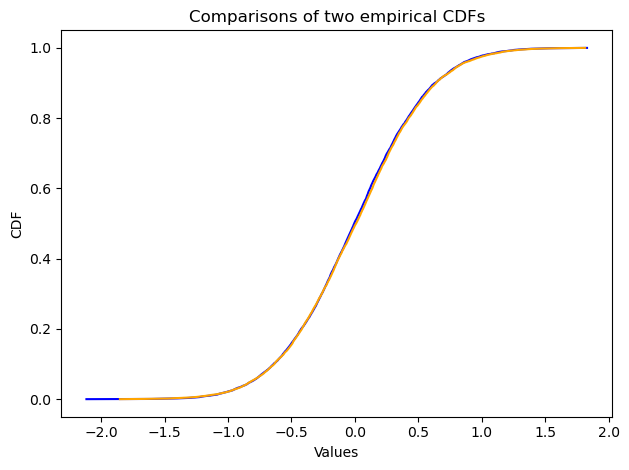

In [549]:
##Można też porównywać dwa rozkłady empiryczne
from scipy.stats import ks_2samp
norm_1 = scipy.stats.norm(0,0.5)
norm_2 = scipy.stats.norm(0,0.501)
data_1 = norm_1.rvs(size=10000)
data_2 = norm_2.rvs(size=10000)

stat, p = ks_2samp(data_1, data_2)

print(stat)
print(p)

sorted_1 = np.sort(data_1)
sorted_2 = np.sort(data_2)


x = np.linspace(0,1,len(data_1))

fig, ax = plt.subplots()
ax.plot(sorted_1, x, color='blue')
ax.plot(sorted_2, x, color='orange')
ax.set(title='Comparisons of two empirical CDFs', xlabel = 'Values', ylabel = 'CDF')
fig.tight_layout()

if p < 0.05:
    print(f'Dane nie pochodzą z tego samego rozkładu!')
else:
    print(f'Brak wystarczających dowodów, aby stwierdzić, że dane nie pochodzą z tego samego rozkładu.')


In [550]:
##shapiro_test dla porownania

np.random.seed(1)

data = np.random.binomial(n=10000, p=0.5, size=3000)
data = data - np.mean(data)
data = data / np.sqrt(np.var(data))

stat, p = scipy.stats.shapiro(data)

print(stat)
print(p)

if p < 0.05:
    print(f'Dane nie mają rozkładu normalnego!')
else:
    print(f'Test nie stwierdził, że dane nie mają rozkładu normalnego. Hipoteza zerowa przetrwała.')




0.9992111325263977
0.21859198808670044
Test nie stwierdził, że dane nie mają rozkładu normalnego. Hipoteza zerowa przetrwała.


Zadania praktyczne
-
__Zadanie 7.__
Wygeneruj tablicę 10000 danych o standardowym rozkładzie jednostajnym, mając do dyspozycji rozkład wykładniczy o średniej $0.5$. Następnie wygeneruj histogram oraz ___KDE plot___ tych danych i przetestuj hipotezę, że faktycznie pochodzą one z rozkładu jednostajnego. __Podpowiedź:__ Czy jeśli zastąpimy rozkład wykładniczy rozkładem Cauchy'ego, to zadanie stanie się trudniejsze czy łatwiejsze? 


__Zadanie 8.__
Filemon z nudów tworzy ciąg w następujący sposób. Pierwszy wyraz jest równy $a_1 = 1$, każdy kolejny wyraz jest losowany ze standardowego rozkładu jednostajnego tak długo, jak ciąg pozostaje monotoniczny. Oznaczmy przez $m$ wartość ostatniego wyrazu tego ciągu. Oszacuj numerycznie oraz za pomocą metody Monte-Carlo pierwszy oraz trzeci moment zmiennej losowej $m$. Czy jesteś w stanie podać jego dokładną wartość?

__Zadanie 9.__
Oszacuj prawdopodobieństwo, że w losowo wybranej permutacji ze zbioru $n$ elementowego istnieje cykl o długości $l \geq \frac{n}{2}$. Narysuj histogram zmiennej losowej będącą długością największego cyklu w losowej permutacji.
* __Zadanie dodatkowe 1:__ Na tej podstawie zaprojektuj strategię w następującej grze. Dane jest $1000$ pudełek, każde z imieniem jednego z $1000$ więźniów, a w pudełkach losowo poukładane klucze do celi więźniów, w każdym po jednym. Więźniowe nie mogą się komunikować, kolejno do pokoju z pudełkami wchodzi jeden więzień i wolno mu spojrzeć do $500$ z pudełek, po czym wskazuje na pudełko, w którym znajduje się jego klucz. Jeśli którykolwiek się pomyli, więźniowie przegrywają, w przeciwnym wypadku więźniowie wygrywają i wychodzą z więzienia. Następnie przeprowadź symulację, aby przetestować skuteczność strategii więźniów. 
* __Zadanie dodatkowe 2:__ Na przyjęciu jest 100 krasnoludków i każdy z nich ma czapkę niebieską lub czerwoną. Krasnoludki nie widzą swoich czapek, ale widzą czapki wszystkich innych uczestników. Krasnoludki nie mogą się komunikować. W pewnym momencie, wszystkie jednocześnie zgadują kolor swojej czapki. Czy krasnoludki mogą zagwarantować, że przynajmniej połowa z nich zgadnie swój kolor (/a średnio więcej niż połowa)? 

__Zadanie 10.__
Dwóch hazardzistów na przemian rzuca symetryczną monetą, wygrywając od przeciwnika $1$ dollara, za każdy rzut z przypisanym do nich wynikiem. Oszacuj prawdopodobieństwo, z jakim po $20$ rzutach będzie remis. Następnie porównaj z prawdopodobieństwem, że przez pierwsze $20$ będzie prowadził jeden z graczy (którykolwiek jeden). Czy potrafisz wytłumaczyć tą zależność intuicyjnie? Przeprowadź 10000 symulacji, tej gry oraz wygeneruj histogram zmiennej losowej, będącą maksymalnym bezwzględnym wynikiem zarejestrowanym w czasie gry. Oblicz jego współczynnik asymetrii i kurtozy (`scipy.stats.kurtosis()` i `scipy.stats.skew()`).

__Zadanie 11.__ 
Proces Wienera to proces stochastyczny (rozkład losowy na przestrzeni ciągłych wykresów), w którym przyrosty są niezależne, $W_0 = 0$ oraz zachodzi $$W_{t+\delta t} - W_{t} \sim \mathcal{N}(0,\delta t) $$ Napisz funkcję generującą ciągły spacer będący przybliżeniem procesu Wienera (dla ustalonego podziału odcinka $[0,1]$). Oszacuj, jakie jest średnie maksimum procesu Wienera oraz jego wariancja (na odcinku $[0,1]$). Porównaj z: $\mathbb{E}[\left|W_{1}\right|]$. Korzystając z funkcji `scipy.stats.gaussian_kde`, oszacuj funkcję gęstości dla obu zmiennych losowych.

0.7844069846346043
0.7991719894881535
0.3629084788487856
0.3629084788487856


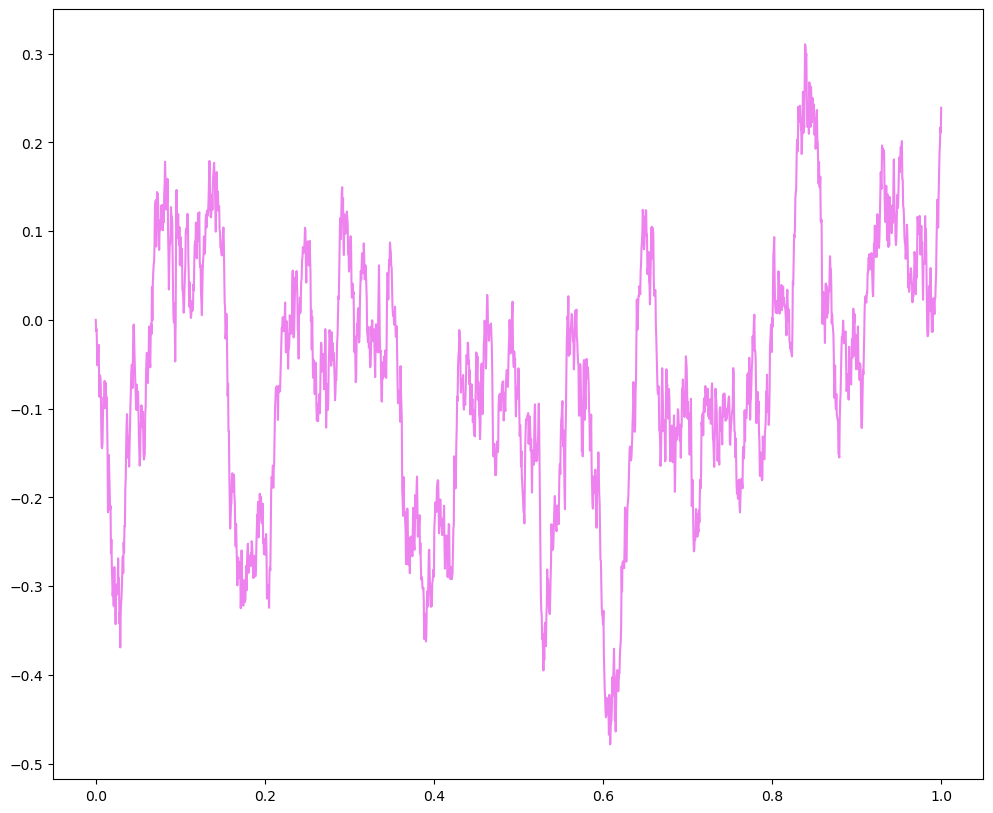

In [551]:
def wiener(n = 1000, plot=True):
    delta = 1/n
    sigma = np.sqrt(delta)
    res = np.zeros(shape=(n+1,))
    res[1:] = np.random.normal(loc=0, scale=sigma, size=n)
    res = np.cumsum(res)
    x = np.linspace(0,1,n+1)
    if plot:
        plt.figure(figsize=(12,10))
        plt.plot(x, res, color='violet')
    return np.max(res), np.abs(res[n])

data = []
num = 30000
n = 3500
sum = 0
for itr in range(num):
    a, l = wiener(n=n, plot=False)
    sum = sum + l
    data += [a]
data = np.array(data)
mean_max = np.mean(data)
evar = np.var(data, ddof=1)
evar_ = (1/(len(data)-1)) * np.sum(((data - mean_max) ** 2))


print(mean_max)
print(sum/num)
print(evar)
print(evar_)


_, _= wiener(2000)
    
        
        

kurtosis: -1.1639030233526946
skewness: -0.03681108518520097


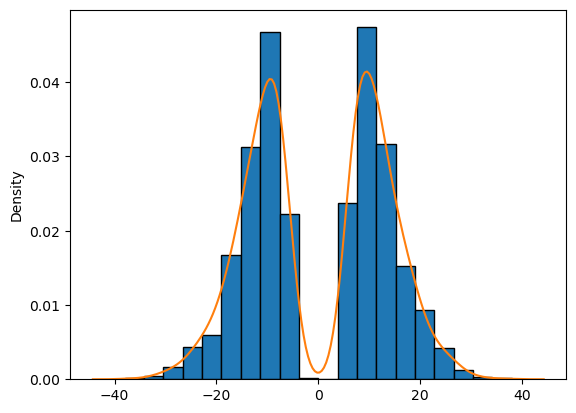

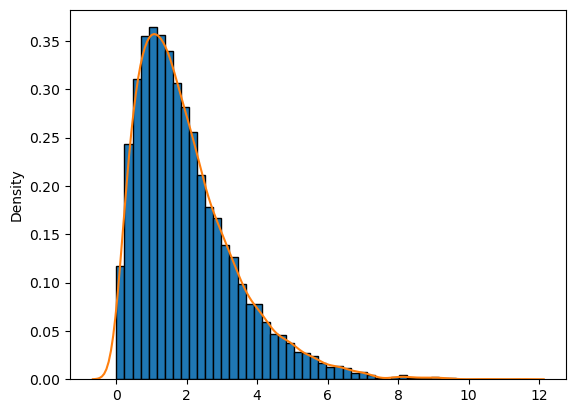

In [552]:
np.random.seed(1)

simul = []
for i in range(10000):
    M = 0
    result = 0
    for t in range(100):
        toss = np.random.choice([-1,1], p=[0.5,0.5])
        result += toss
        if abs(result) > abs(M):
            M = result
    simul.append(M)

data = np.array(simul)




lower = np.quantile(data, 0.05)
upper = np.quantile(data, 0.95)
data_filtered = data[(data>=lower) & (data<=upper)]


plt.figure()
plt.hist(data, bins=20, edgecolor = 'black', density=True)
sns.kdeplot(data)

gam = np.random.standard_gamma(shape=2, size=10000)


plt.figure()
plt.hist(gam, bins=50, edgecolor = 'black', density=True)
sns.kdeplot(gam)


print(f'kurtosis: {scipy.stats.kurtosis(data)}')
print(f'skewness: {scipy.stats.skew(data)}')

data;

        
        
        

In [553]:
from scipy.stats import norm
from scipy.stats import kstest

p_mean = 0
for i in range(100):
    data = np.random.normal(scale=1.5, size=10000)
    norm_1 = norm(loc=0, scale=1.5)
    data = norm_1.cdf(data)
    
    ks_stat, p_value = kstest(data, 'uniform')
    
    if p_value > 0.5:
        p_mean += 1
p_mean /= 100
print(p_mean)

0.49


In [554]:
print(np.sqrt(2/np.pi))

0.7978845608028654
